# Data Preprocessing

In [2]:
#import libraries
from sklearn.model_selection import train_test_split
import numpy as np
import os
import PIL
import cv2
import pickle
import mediapipe as mp
# NOTE: you may have to download openCV, sklearn, PIL, 

## Feature Extraction

In [3]:
#DIRECTORY = "./data/" # MacOS
DIRECTORY = "C:\mixto" # Windows/PC

CATEGORIES = ['IncorrectlyWorn', 'WithMask','WithoutMask']
IMG_SIZE = 64 # IMG_SIZE = 224 alternative size

#data
X = []
#labels(0,1,2)
y = []

def create_data(X,y):
    for category in CATEGORIES:
        path = os.path.join(DIRECTORY, category)
        class_num_label = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                img_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                X.append(img_array)
                y.append(class_num_label)
            except Exception as e:
                pass
            
create_data(X,y)

## Convert to Numpy Array

In [4]:
# Get images as a 4,096 feature set 
# Cada imagen es un set de 64x64 píxeles=4096
# np: librería para el tratamiento de datos y el cálculo numérico en python
SAMPLE_SIZE = len(y)
data = np.array(X).flatten().reshape(SAMPLE_SIZE, IMG_SIZE*IMG_SIZE) # pixel-features

# Turn X and y into numpy arrays. Aquí tengo un vector de imágenes: 1479 imágenes, con 4096 pixeles cada una
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE) # images
y = np.array(y) # target

print("Features, X shape: ", X.shape)
print("Target, y shape: ", y.shape)
print("Data shape: ", data.shape)

ValueError: cannot reshape array of size 18173952 into shape (1479,4096)

## Plot Dataset Images

<ipython-input-5-3c64e0737b87>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(5 / columns + 1, columns, i + 1)


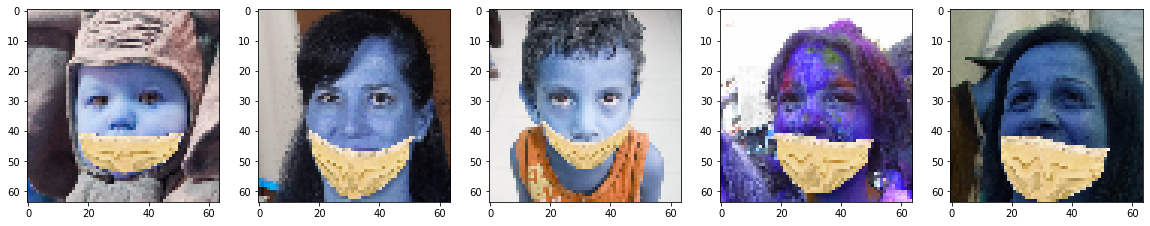

In [5]:
import matplotlib.pyplot as plt # to plot inage, graph
%matplotlib inline

plt.figure(figsize=(20,10))
columns = 5
for i in range(5):
    plt.subplot
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i],cmap=plt.cm.gray_r,interpolation='nearest')
    

In [6]:
pa=[]
ej=[]
CH=[]
ej=X[40]
# Prueba de parámetros que mejor resultados dan para Harris
CH=cv2.cornerHarris(ej,2,3,0.04)
flat= np.array(CH).flatten()

for i in range(len(flat)):
    if flat[i]>0.01*CH.max():
        pa.append(i)
        
#ej[CH>0.01*CH.max()]=[0] cv2.imshow('CH',ej) if cv2.waitKey(0) & 0xff == 27  cv2.destroyAllWindows()


error: OpenCV(4.5.4) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\corner.cpp:254: error: (-215:Assertion failed) src.type() == CV_8UC1 || src.type() == CV_32FC1 in function 'cv::cornerEigenValsVecs'


In [7]:
# Crearé un vector de features muy básico
features = []

def facialLandmarksFeatures(image, verbose=False):
    '''
    Get the facial landmarks' features
    '''
    mesh = mp.solutions.face_mesh
    face_mesh = mesh.FaceMesh()
    height, width, _ = image.shape

    if verbose:
        print("Height, width", height, width)

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Funcion que da los facial_landmarks

    image_l = face_mesh.process(rgb_image)
    list=[]
    
    for face in image_l.multi_face_landmarks:
        for landmark in face.landmark:
            suma_b=0
            suma_g=0
            suma_r=0
            x = int(landmark.x * width)
            y = int(landmark.y * height)
            list.append(x)
            list.append(y)
            for s in range(x-1,x+1):
                for t in range(y-1,y+1):

                    suma_b=suma_b+image.item(t,s,0)
                    suma_g=suma_g+image.item(t,s,1)
                    suma_r=suma_r+image.item(t,s,2)


            suma_b=suma_b/9
            suma_g=suma_g/9
            suma_r=suma_r/9     
            list.append(suma_b)
            list.append(suma_g)
            list.append(suma_r)

    return list

# Función que recibe una imagen como entrada y devuelve un vector de características para cada imagen
def getFeatures(img):
    '''
    Función que recibe una imagen como entrada y devuelve un vector de características para cada imagen
    '''
    features = []
    ## Características
    features = features + avg(img)
    features = features + avgUpperHalf(img)
    features = features + avgLowerHalf(img)
    features = features + var(img)
    features = features + facialLandmarksFeatures(img)
    ##
    #features=np.concatenate((features,Harris(img,2,3,0.04,0.01)))
    return features



def avg(img):
    '''
    Media de la imagen    
    '''
    channels = cv2.split(img)
    features = []
    for c in channels:
        aux=np.array(c).flatten()
        features.append(np.mean(aux))
    return features

def avgUpperHalf(img):
    '''
    Media de la mitad superior de la imagen
    '''
    channels = cv2.split(img)
    features = []
    for c in channels:
        aux=np.array(c).flatten()
        features.append(np.mean(aux [: len(aux)//2]))
    return features

def avgLowerHalf(img):
    '''
    media de la mitad inferior de la imagen
    '''
    channels = cv2.split(img)
    features = []
    for c in channels:
        aux=np.array(c).flatten()
        features.append(np.mean(aux [len(aux)//2 :]))
    return features

def var(img):
    '''
    Varianza de la imagen
    '''
    return ([np.var(img)])

def Harris(img,blockSize,ksize,k,select):
    '''
    Esquinas de harris.   Posible PROBLEMA: no son el mismo nº de puntos de interés para cada imagen
    @param: 
     blockSize: tamaño del vecindario
     ksize: apertura de la derivada de Sobel usada
     k: parámetro libre del detector de Harris
     select: porcentaje por encima del cuál se consideran puntos de interés 
    
    '''
    CH=[]
    Corners=[]
    # Prueba de parámetros que mejor resultados dan para Harris
    CH=cv2.cornerHarris(img,blockSize,ksize,k)
    flat= np.array(CH).flatten()

    for i in range(len(flat)):
        if flat[i]>select*CH.max():
            Corners.append(i)

    return(Corners)  # Devuelve un vector que ocupa un puesto en el vector resultado

In [8]:
# Procesamiento por img´
trys=len(X)
error = 0
for i in range(trys):
    try:
        f = getFeatures(X[i])
        features.append(f)
    except:
        X.pop(i - error)
        y.pop(i - error)
        error +=1
        #print("Error")

print(len(X),len(y),len(features))
print("Errors: ",error)

# Tengo que solucionar lo de Nan

717 717 717
Errors:  762


In [9]:
## Limpieza de nan por 0
features=np.nan_to_num(features,copy=True)


In [10]:
H = getFeatures(X[0])

print(len(H))

2350


## Save Dataset as Pickles
Since storing image files can be very big, pickling makes it easier to work with the data across our models. It also helps us avoid the feature extraction step again and ensure that we are all working with the same data.

In [11]:
#Saves us from having to regenerate our data by saving our data
# se guarda como pickles. Debería hacer previamente el paso de feature extraction
pickle_out = open("X.pickle", "wb")
pickle.dump(features, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("data.pickle", "wb")
pickle.dump(features, pickle_out)
pickle_out.close()

## Load Pickles

In [12]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)
pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in)

## Total Classification Counts

In [13]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 717


AttributeError: 'bool' object has no attribute 'sum'

## Split Train and Test

In [ ]:
# Split our data into testing and training. Randomiza los sets y mete un 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
train_test_split
# Print the length and width of our testing data.
print('Length of our Training data: ',len(X_train), '\nLength of our Testing data: ',len(X_test))

Length of our Training data:  1183 
Length of our Testing data:  296
